# Project - Credit Card Fraud Detection using Machine Learning

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset has been collected and analyzed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The dataset could be found in https://www.kaggle.com/mlg-ulb/creditcardfraud

More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

## Import the Modules

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Load the Dataset

In [11]:
data = pd.read_csv('/cxldata/projects/creditcard.csv')

In [12]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [13]:
data.shape

(284807, 31)

## Explore the Data

In [17]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
data.count()

Time      284807
V1        284807
V2        284807
V3        284807
V4        284807
V5        284807
V6        284807
V7        284807
V8        284807
V9        284807
V10       284807
V11       284807
V12       284807
V13       284807
V14       284807
V15       284807
V16       284807
V17       284807
V18       284807
V19       284807
V20       284807
V21       284807
V22       284807
V23       284807
V24       284807
V25       284807
V26       284807
V27       284807
V28       284807
Amount    284807
Class     284807
dtype: int64

In [33]:
#splitting feature and label

X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [28]:
print(data['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [34]:
# Exploring the Class Column

print('Valid Transactions: ', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')

print('Fraudulent Transactions: ', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

Valid Transactions:  99.83 % of the dataset
Fraudulent Transactions:  0.17 % of the dataset


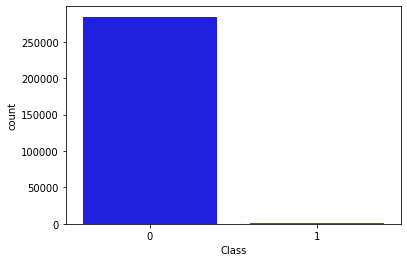

In [35]:
#Visualizing the class Imbalance

colors = ['blue','red']
sns.countplot('Class', data=data, palette=colors)

- From our analysis, we observe there is a lot of imbalance in the classes, with most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occur (0.17%) of the time in the dataframe.

- Using this imbalanced data as such is not a good idea for training a model to classify if a transaction is fraudulent or not.

- This is because, if this imbalanced data is used to train a model, the algorithm does not have a decent amount of fraudulent-data to learn the patterns of fraudulent transactions. Thus, it most probably assumes that every transaction is non-fraudulent(the dominant class of the data).

- This would be a pity because the model naively assumes but doesn't learn/detect the patterns in order to classify.

- To make the dataset balanced, we could either undersample or oversample it.

- We should do most pre-processing steps (splitting the data, normalization/standardization, etc) before under/over-sampling the data.

- This is because many sampling techniques require a simple model to be trained (e.g. SMOTE uses a k-NN algorithm to generate samples). These models have better performance on pre-processed datasets (e.g. both k-NN and k-means use euclidean distance, which requires the data to be normalized).

- So, in order for the sampling techniques to work best, we should previously perform any pre-processing steps we can. Then we shall proceed to use SMOTE technique to oversample the train data in order to use it to rain the classification algorithm.

## Split the Data

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)

print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (199364, 30)
Transaction classes in y_train dataset:  (199364, 1)
Transactions in X_test dataset:  (85443, 30)
Transaction classes in y_test dataset:  (85443, 1)


## Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler_amount = StandardScaler()
scaler_time = StandardScaler()

In [49]:
X_train['normAmount'] = scaler_amount .fit_transform(X_train['Amount'].values.reshape(-1, 1))

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
X_test['normAmount'] = scaler_amount .transform(X_test['Amount'].values.reshape(-1, 1))

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
X_train['normTime'] = scaler_time .fit_transform(X_train['Time'].values.reshape(-1, 1))

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
X_test['normTime'] = scaler_time .transform(X_test['Time'].values.reshape(-1, 1))

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
X_train = X_train.drop(['Time', 'Amount'], axis=1)
X_test = X_test.drop(['Time', 'Amount'], axis=1)

In [54]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,normTime
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.165692,0.402560
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.352239,0.853047
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.330886,0.646288
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.336067,-1.290102
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.005211,1.060059


## Apply SMOTE Technique

- SMOTE stands for Synthetic Minority Over-sampling Technique. SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

In [70]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [71]:
print("Before over-sampling:\n", y_train['Class'].value_counts())

Before over-sampling:
 0    199019
1       345
Name: Class, dtype: int64


In [72]:
sm = SMOTE()

In [73]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train['Class'])

In [74]:
print("After over-sampling:\n", y_train_res.value_counts())

After over-sampling:
 1    199019
0    199019
Name: Class, dtype: int64


## Build the Model

In [79]:
#Training the Classification Algorithm

from sklearn.model_selection import GridSearchCV

In [80]:
from sklearn.linear_model import LogisticRegression

In [82]:
from sklearn.metrics import confusion_matrix, auc, roc_curve

In [83]:
# Asigning parameters and their values for the grid-search.

parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#paramter C is the regularization parameter, and penalty is the norm used in the penalization.

In [84]:
lr = LogisticRegression()

In [85]:
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)

In [86]:
k = clf.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.7s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:   49.3s finished


In [87]:
print(k.best_params_)


{'C': 100, 'penalty': 'l2'}


## Evaluate the Model

In [96]:
#Get Confusion matrix and Recall

lr_gridcv_best = clf.best_estimator_

In [97]:
y_test_pre = lr_gridcv_best.predict(X_test)

In [98]:
cnf_matrix_test = confusion_matrix(y_test, y_test_pre)

In [99]:
print("Recall metric in the test dataset:", (cnf_matrix_test[1,1]/(cnf_matrix_test[1,0]+cnf_matrix_test[1,1] )))

Recall metric in the test dataset: 0.9183673469387755


In [100]:
y_train_pre = lr_gridcv_best.predict(X_train_res)


In [101]:
cnf_matrix_train = confusion_matrix(y_train_res, y_train_pre)

In [102]:
print("Recall metric in the train dataset:", (cnf_matrix_train[1,1]/(cnf_matrix_train[1,0]+cnf_matrix_train[1,1] )))

Recall metric in the train dataset: 0.9185002436953256


In [108]:
# Visualize the Confusion Matrix

from sklearn.metrics import plot_confusion_matrix

In [109]:
class_names = ['Not Fraud', 'Fraud']

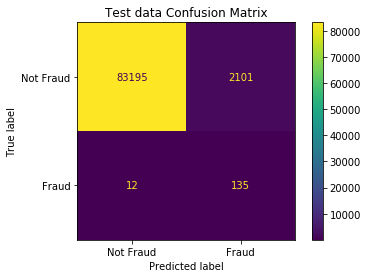

In [110]:
plot_confusion_matrix (k, X_test, y_test,  values_format = '.5g', display_labels=class_names)
plt.title("Test data Confusion Matrix")
plt.show()

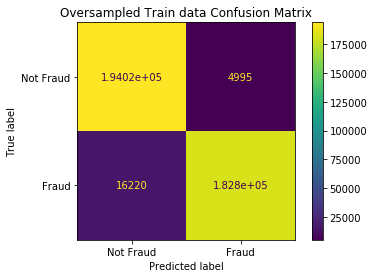

In [111]:
plot_confusion_matrix(k, X_train_res, y_train_res,  values_format = '.5g', display_labels=class_names) 
plt.title("Oversampled Train data Confusion Matrix")
plt.show()

In [114]:
# ROC-AUC Curve

y_k =  k.decision_function(X_test)

In [115]:
y_k

array([-1.68022431, -2.04000424, -1.75490219, ..., -2.90996965,
       -2.06109516, -2.04166901])

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_k)

In [117]:
roc_auc = auc(fpr, tpr)

In [118]:
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.983928475723435


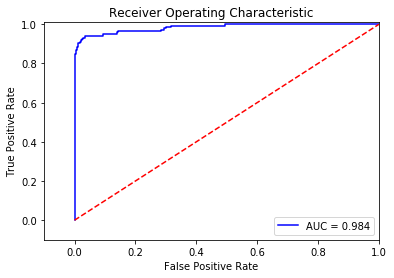

In [119]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- We have been given the Europe credit-card transaction data of 2 days. For privacy reasons, the personal details have been represented in the form of Principle Components. The Amount(the transaction Amount) and Time(the seconds elapsed between each transaction and the first transaction in the dataset) are also part of the columns other than the principal components. The transactions are of valid and fraudulent types. The goal is to build a classifier to detect fraudulent transactions.

- We have first loaded the data, explored it, and checked for any null values. While exploring, we found that the data is of high class-imbalance, with around 99.83% being valid transactions whereas about 0.17% are fraudulent.

- It is not a good idea to train a classifier with such highly imbalanced data as it leads to mere assumptions rather than learning by the algorithm. We could either undersample or oversample the data to achieve a balance between the class-wise data samples.

- We have split the data into train and test parts, in order to prevent any data leakage and to keep the test data untouched, before oversampling.

- We have scaled the Amount and Time features using StandardScaler.

- We then applied the SMOTE technique to oversample the train data and formed a new dataset with the thus obtained over-sampled datapoints.

- We used the GridSearch method with different parameter values, trained logistic regression classifiers with the different combinations of these parameters, and got the best logistic regression classifier which yields the least loss on the over-sampled data-set. All this mechanism is internally implemented by GridSearchCV of sklearn.

- We then used the best estimator thus obtained to evaluate its performance on the unseen test data. We calculated the recall, confusion-matrix and roc-auc scores.